ETL Report

In this document steps are taken to obtain data and transform it to answer the following questions:

1) How does the number of business owners vary by race in the United States.
2) Can the breakdown of business owners by race provide us with any correlation between number of business owners and number of firms?
3) How does the number of business owners vary by gender in the United States?

The following cell shows the code written to obtain data from the API's used.

In [68]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

#REQUESTING API
TotalDataByStateLink ="https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=state:*&NAICS2017=00"
TotalBusinessOwnersUS= "https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_ETH,OWNER_RACE,OWNER_VET,OWNPDEMP&for=us:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02"
TotalBusinesses = "https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=us:*&NAICS2017=00&BUSCHAR=A1&QDESC=B01"

response1 = requests.get(TotalBusinessOwnersUS)
response2 = requests.get(TotalBusinesses)

data1 = json.loads(response1.text)
data2 = json.loads(response2.text)

bo = pd.DataFrame.from_dict(data1)
b = pd.DataFrame.from_dict(data2)

In order to use the data it had to be cleaned by first adjusting the column headings, then removing any duplicate/ unnecessary rows. That was done using the following.

In [69]:
#CLEANING
header_row = 0
bo.columns = bo.iloc[0]
bo = bo[1:]
bo.reset_index(inplace = True)

header_row = 0
b.columns = b.iloc[0]
b = b[1:]
b.reset_index(inplace = True)

In addition to changing the column headings, steps had to be taken to remove unnecessary columns and also rename columns. This allows for one to be able to focus on the necessary data.

In [86]:
#MORE CLEANING OF THE DATA
businessO= bo.drop(columns=['index','NAICS2017_LABEL','OWNCHAR', 'NAICS2017', 'QDESC', 'us'])
businessO = businessO.rename(columns={'OWNPDEMP': 'No.BusinessOwners'})

business = b.drop(columns = ['index', 'NAICS2017_LABEL', 'NAICS2017','BUSCHAR', 'QDESC', 'us'])
business = business.rename(columns = {'FIRMPDEMP': 'No.Firms', 'RACE_GROUP': 'OWNER_RACE', 'ETH_GROUP': 'OWNER_ETH', 'VET_GROUP':'OWNER_VET', 'SEX':'OWNER_SEX'})

# business.head(15)
# businessO.head(15)

The next step taken was filtering the data in order to get the count of business owners per race. This was possible using the following code. P.S the code for the races was given by a key available on the website used.

In [87]:
#FILTERING FOR NECESSARY DATA FOR BUSINESS OWNERS.

businessByRace = businessO[(businessO['OWNER_SEX'] == '001') & (businessO['OWNER_ETH'] == '001') & (businessO['OWNER_VET'] == '001') & (businessO['OWNER_RACE'] != '00')& (businessO['OWNER_RACE'] != '90')& (businessO['OWNER_RACE'] != '92')]
businessByRace['No.BusinessOwners'] = businessByRace['No.BusinessOwners'].astype(int)
bbrownersgraph = businessByRace[['OWNER_RACE', 'No.BusinessOwners']]
# bbrownersgraph


<ipython-input-87-ac3055240920>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We were able to use the filtered data to create the first visualization. Two visuals were made, one with the codes and one using the actual names of the races.

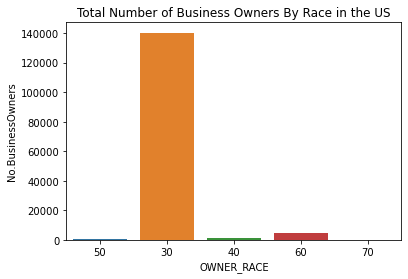

C:\Users\Keith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



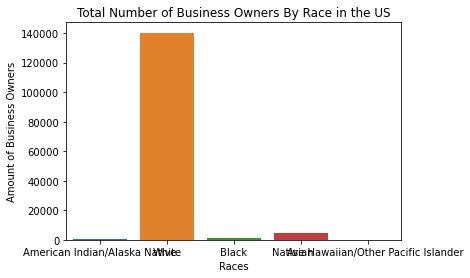

In [72]:
# GENERATING BAR CHART FOR THE NUMBER OF BUSINESS OWNERS BY RACE.
import seaborn as sns
import matplotlib.pyplot as plt

races = ['American Indian/Alaska Native', 'White', 'Black', 'Asian', 'Native Hawaiian/Other Pacific Islander']
Amount = [372, 140242, 1224, 4497, 136]
sns.barplot(x = 'OWNER_RACE',
            y = 'No.BusinessOwners',
            data = bbrownersgraph).set_title('Total Number of Business Owners By Race in the US')
 
# Show the plot
plt.show()

#Graph with correct axis.
ax = sns.barplot(races, Amount)
ax.set(xlabel ='Races', ylabel ='Amount of Business Owners')
plt.title('Total Number of Business Owners By Race in the US');
plt.show()

In [88]:
# FILTERING FOR NUMBER OF FIRMS.
businessByRace1 = business[(business['OWNER_SEX'] == '001') & (business['OWNER_ETH'] == '001') & (business['OWNER_VET'] == '001') & (business['OWNER_RACE'] != '00')& (business['OWNER_RACE'] != '90') & (business['OWNER_RACE'] != '91')& (business['OWNER_RACE'] != '92')]
businessByRace1['No.Firms'] = businessByRace1['No.Firms'].astype(int)
bbrfirmssgraph = businessByRace1[['OWNER_RACE', 'No.Firms']]
# bbrfirmsgraph

<ipython-input-88-baff0dc76636>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dataframes for number of business owners and number of firms were merged in order to establish a relationship between number of business owners and number of firms. 

Text(0, 0.5, 'Number of Firms')

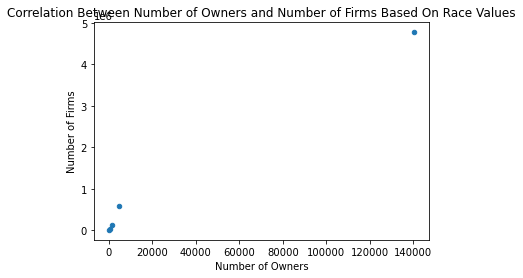

In [89]:
bbrownersgraph_with_bbrfirmsgraph = bbrownersgraph.merge(bbrfirmsgraph,how='inner',on='OWNER_RACE')
#CREATING SCATTERPLOT SHOWING CORRELATION BETWEEN NUMBER OF BUSINESS OWNERS AND NUMBER OF FIRMS IN THE U.S.
bbrownersgraph_with_bbrfirmsgraph
ax = bbrownersgraph_with_bbrfirmsgraph.plot(title = 'Correlation Between Number of Owners and Number of Firms Based On Race Values', kind='scatter', x='No.BusinessOwners',y='No.Firms')
ax.set_xlabel('Number of Owners')
ax.set_ylabel('Number of Firms')



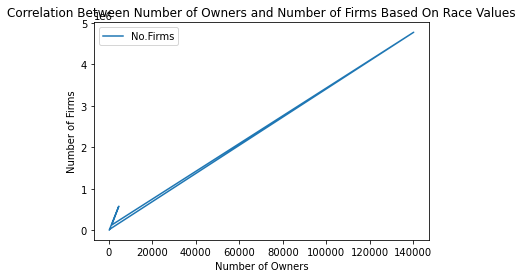

In [81]:
# LINE GRAPH FOR CORRELATION BETWEEN NUMBER OF FIRMS AND NUMBER OF BUSINESS OWNERS IN THE UNITED STATES.

bbrownersgraph_with_bbrfirmsgraph.plot('No.BusinessOwners', 'No.Firms')
plt.xlabel('Number of Owners')
plt.ylabel('Number of Firms')
plt.title('Correlation Between Number of Owners and Number of Firms Based On Race Values')
plt.show()

These are the steps taken to filter the data to show the breadown of the number of business owners by sex.

In [90]:
#FILTERING FOR A BREAKDOWN OF BUSINESS OWNERS BY GENDER IN THE U.S.
businessByGender = businessO[(businessO['OWNER_SEX'] != '001') & (businessO['OWNER_ETH'] == '001') & (businessO['OWNER_VET'] == '001') & (businessO['OWNER_RACE'] == '00')]

businessByGender['No.BusinessOwners'] = businessByGender['No.BusinessOwners'].astype(int)
bbggraph =  businessByGender[['OWNER_SEX', 'No.BusinessOwners']]
bbggraph

<ipython-input-90-f7317289ac08>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,OWNER_SEX,No.BusinessOwners
4,002,33689
5,003,112357


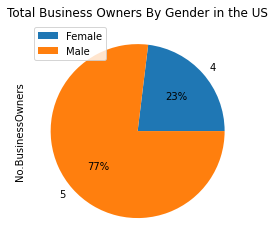

In [59]:
#GENERATING PIE CHART TO SHOW DIFFERENCE BETWEEN MALE AND FEMALE BUSINESS OWNERS IN THE U.S.
bbg = bbggraph.plot(title = 'Total Business Owners By Gender in the US', kind = 'pie', y = 'No.BusinessOwners', autopct='%.0f%%')
bbg.legend(['Female', 'Male'])

In [ ]:
#  businessO_with_business = businessO.merge(business, how = 'inner', on= 'OWNER_RACE' and 'OWNER_ETH') 

# businessO_with_business